# Radioactivity in Air Analysis

## Introduction

The goal of this experiment is to measure and identify radioactive substances in the air with high accuracy and specificity. Isotopes of interest include:

1. Uranium-238 => Lead-206
2. Thorium-232 => Lead-208
3. Uranian-235 => Lead-207

Our criteria for differentiating isotopes depends on ____

### Equipment

1. Geiger-Mueller Tube: Radiation measurement.
    * Tube has ionized gas, any ionizing radiation causes a negative charge accumulation.
2. Picker-Scaler: Power supply.
3. DAQ/Computer Setup.

## Data Collection

### Cesium-137 Calibration Data for Voltage

* Geiger-Mueller count was taken for 4 rounds of 15 seconds per trial.
* Trials ranged from 500-1000 Volts in increments of 50 for a total of 10 trials.
* The result was used to determine the optimal voltage for the remaining data collection exercises.
* Error per trial: +/- 1 click.

### Background Radiation Measurement

* 



In [55]:
### IMPORT BOX ###
import pandas as pd
import matplotlib.pyplot as plt

# Uniform Styling of plots
plt.style.use('ggplot')

In [61]:
"""
=== CESIUM DATA IMPORT ===

This script imports the data for Cesium-137 radioactivity at various Geiger-Mueller meter voltages.

Output is a dictionary with key/values {`voltage`: [`frequency1`, `frequency2`, ..., `frequencyn`]}

Frequencies are measured in hertz.

"""

path = '../data/cesium-calibration/'
cesium_dict = {}

for i in range(600, 1201, 50):
    try:
        tmp_df = pd.read_csv(str(path + str(i) + '.txt'), sep='\t')[1:]
        tmp_df.columns = ['count']

        tmp_df = tmp_df['count'].tolist()

        for j in range(len(tmp_df)):
            tmp_df[j] = float(tmp_df[j])/15

        cesium_dict.update({i: tmp_df})
    except:
        pass
    
print('Finished extracting cesium calibration data...')

Finished extracting cesium calibration data...


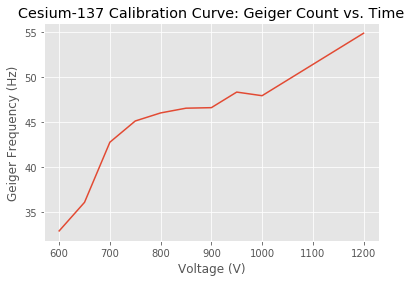

In [72]:
"""
=== PLOTTING CESIUM DATA ===

Here we look for a plateau in the relationship such that the Geiger Count is independent of applied Voltage.

"""

xs_calib = list(cesium_dict.keys())
ys_calib = []

def avg(list_in):
    avg = 0.0
    for i in list_in:
        avg += i
    
    avg /= len(list_in)
    
    return avg

for i in cesium_dict.values():
    ys_calib.append(avg(i))
    
    
# Plotting...
plt.plot(xs_calib, ys_calib)
plt.title('Cesium-137 Calibration Curve: Geiger Count vs. Time')
plt.xlabel('Voltage (V)')
plt.ylabel('Geiger Frequency (Hz)')

plt.savefig('../figures/cesium-calibration-curve.png', dpi=300)

plt.show()

In [73]:
"""
=== BACKGROUND RADIATION DATA IMPORT ===

This script imports the data for background radioactivity at various Geiger-Mueller meter voltages.

Output is a dictionary with key/values {`voltage`: [`frequency1`, `frequency2`, ..., `frequencyn`]}

Frequencies are measured in hertz.

"""

path = '../data/background/background-'
background_dict = {}

for i in range(500, 1201, 50):
    try:
        tmp_df = pd.read_csv(str(path + str(i) + '.txt'), sep='\t')[1:]
        tmp_df.columns = ['count']

        tmp_df = tmp_df['count'].tolist()

        for j in range(len(tmp_df)):
            tmp_df[j] = float(tmp_df[j])/15 # divide by 15 because each test was 15 seconds long

        background_dict.update({i: tmp_df})
    except:
        pass

print('Completed extracting background data...')

Completed extracting background data...


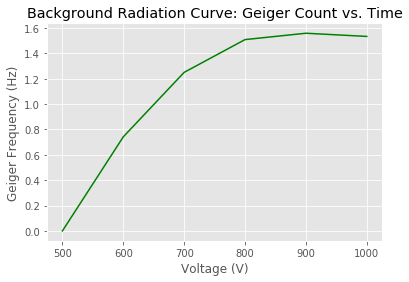

In [77]:
"""
=== PLOTTING BACKGROUND RADIATION DATA ===

Here we look for the relationship between measured background radiation and applied voltage.

Based on the Cesium-137 calibration graph, the region between 800 and 1000 volts is of particular interest.

"""

xs_bg = list(background_dict.keys())
ys_bg = []

for i in background_dict.values():
    ys_bg.append(avg(i))
    
    
# Plotting...
plt.plot(xs_bg, ys_bg, 'g')
# plt.plot(xs_calib[0:len(xs_calib)-1], ys_calib[0:len(ys_calib)-1], 'r')
plt.title('Background Radiation Curve: Geiger Count vs. Time')
plt.xlabel('Voltage (V)')
plt.ylabel('Geiger Frequency (Hz)')

plt.savefig('../figures/background-radiation-voltage-curve.png', dpi=300)

plt.show()